### Import  Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
dataset = pd.read_csv('Healthcare_dataset.csv')
dataset.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [3]:
dataset.shape

(3424, 69)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

### Checking for Null and Duplicated Values 

In [5]:
dataset.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

In [6]:
dataset.isnull().sum().sum()

0

In [7]:
dataset.duplicated().sum()

0

We do not to bother about null values and duplicated values because the dataset has non.

### Descriptive Analysis of Numerical Features

In [11]:
column1 = 'Dexa_Freq_During_Rx'
column2 = 'Count_Of_Risks'
columns_description = dataset[[column1, column2]].describe()
print(columns_description)

       Dexa_Freq_During_Rx  Count_Of_Risks
count          3424.000000     3424.000000
mean              3.016063        1.239486
std               8.136545        1.094914
min               0.000000        0.000000
25%               0.000000        0.000000
50%               0.000000        1.000000
75%               3.000000        2.000000
max             146.000000        7.000000


In [13]:
#checking for more descriptive details of the numerical features
columns_description.loc['variance'] = columns_description.var()
columns_description.loc['skewness'] = columns_description.skew()
columns_description.loc['kurtosis'] = columns_description.kurtosis()
columns_description.loc['median'] = columns_description.median()
columns_description.loc['mode'] = columns_description.mode().iloc[0]

In [14]:
columns_description

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3.424000e+03,3.424000e+03
mean,3.016063e+00,1.239486e+00
std,8.136545e+00,1.094914e+00
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.000000e+00
75%,3.000000e+00,2.000000e+00
max,1.460000e+02,7.000000e+00
variance,1.448487e+06,1.463969e+06
skewness,2.999969e+00,2.999969e+00


### Correlation Between Numerical Features

<AxesSubplot:>

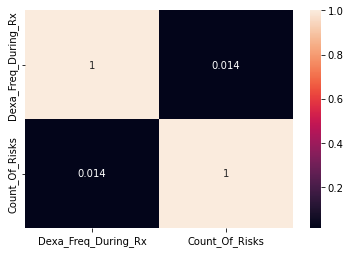

In [17]:
corr = dataset.corr()
sns.heatmap(corr, annot=True)

## Outlier Detection

From the dataset info above, it can be seen that only two columns are of integer(numerical) entries while the rest of the columns have object(categorical) entries. We shall proceed with detecting the outliers in the the two columns with numerical entries which are; Dexa_Freq_During_Rx and Count_Of_Risks

### Box plot for the Dexa_Freq_During_Rx column 

C:\Users\Pass\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pass\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


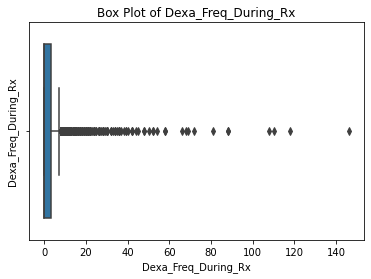

In [18]:
column1_name = 'Dexa_Freq_During_Rx'
sns.boxplot(dataset[column1_name], orient='v', showfliers=True)
plt.title('Box Plot of ' + column1_name)
plt.ylabel( column1_name)
plt.show()

### Histogram for the Dexa_Freq_During_Rx column to check skewness

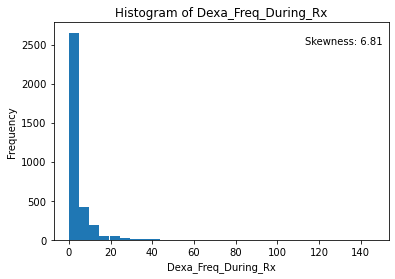

In [19]:
plt.hist(dataset[column1_name], bins=30)
plt.title('Histogram of ' + column1_name)
plt.xlabel(column1_name)
plt.ylabel('Frequency')
skewness = dataset[column1_name].skew()
plt.text(0.75, 0.9, 'Skewness: {:.2f}'.format(skewness), transform=plt.gca().transAxes)

plt.show()

A skewness value of 6.81 suggests a significant positive skew, meaning that the distribution has a long tail on the right side. In practical terms, a positive skewness value of 6.81 indicates that the data has a concentration of values on the left side (lower values) and a few extremely high values that pull the mean towards the right. The tail of the distribution extends towards the higher values, indicating the presence of outliers or extreme values in the dataset.

Define a function to detect and drop outliers using Interquartile Range (IQR)

In [20]:
def detect_outliers_iqr(dataset, column1_name):
    q1 = dataset[column1_name].quantile(0.25)
    q3 = dataset[column1_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (dataset[column1_name] < lower_bound) | (dataset[column1_name] > upper_bound)

In [21]:
column_to_check = 'Dexa_Freq_During_Rx'
dataset = dataset.drop(dataset[detect_outliers_iqr(dataset, column_to_check)].index)

In [22]:
dataset

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


After detecting the outliers in the Dexa_Freq_During_Rx column and dropping them, the new result of the dataset shape shows that 460 outliers were detected and dropped.

### Box plot for the Count_Of_Risks column

C:\Users\Pass\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pass\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


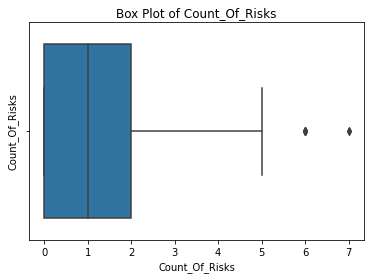

In [23]:
column2_name = 'Count_Of_Risks'
sns.boxplot(dataset[column2_name], orient='v', showfliers=True)
plt.title('Box Plot of ' + column2_name)
plt.ylabel(column2_name)
plt.show()

### Histogram for the Count_Of_Risks column to check skewness

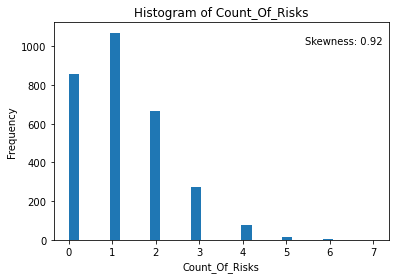

In [24]:
plt.hist(dataset[column2_name], bins=30)
plt.title('Histogram of ' + column2_name)
plt.xlabel(column2_name)
plt.ylabel('Frequency')
skewness = dataset[column2_name].skew()
plt.text(0.75, 0.9, 'Skewness: {:.2f}'.format(skewness), transform=plt.gca().transAxes)

plt.show()

In practical terms, a positive skewness value of 0.92 suggests that the data is not perfectly symmetrical. It indicates that the distribution has a longer tail on the right side and may have some outliers or extreme values on the higher end. However, the skewness is not significantly large, indicating a relatively mild departure from symmetry.

In [25]:
next_column_to_check = 'Count_Of_Risks'
dataset = dataset.drop(dataset[detect_outliers_iqr(dataset, next_column_to_check)].index)

In [26]:
dataset

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,Y,N,N,N,N,N,N,1
3420,P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
3421,P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,...,N,N,Y,N,N,N,N,N,N,1
3422,P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0


The patient id is dropped, because it has no relevance in the analysis to be carried out. In other words, there is no significance of the ptid column.

In [27]:
dataset = dataset.drop(['Ptid'], axis=1)

In [28]:
dataset

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,1
3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,...,N,N,Y,N,N,N,N,N,N,1
3422,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0


After dropping the patient id column, the new shape of our dataset is (2956, 68). The number of columns went from 69 to 68.

### Value_Counts for Columns 

In [30]:
dataset['Gender'].value_counts()

Female    2782
Male       174
Name: Gender, dtype: int64

In [31]:
dataset['Race'].value_counts()

Caucasian           2715
African American      92
Other/Unknown         80
Asian                 69
Name: Race, dtype: int64

In [32]:
dataset['Ethnicity'].value_counts()

Not Hispanic    2797
Hispanic          82
Unknown           77
Name: Ethnicity, dtype: int64

In [33]:
dataset['Region'].value_counts()

Midwest          1212
South            1116
West              384
Northeast         195
Other/Unknown      49
Name: Region, dtype: int64

In [34]:
dataset['Age_Bucket'].value_counts()

>75      1264
65-75     921
55-65     624
<55       147
Name: Age_Bucket, dtype: int64

In [35]:
dataset['Ntm_Speciality'].value_counts()

GENERAL PRACTITIONER                                              1350
RHEUMATOLOGY                                                       510
ENDOCRINOLOGY                                                      367
Unknown                                                            284
ONCOLOGY                                                           187
OBSTETRICS AND GYNECOLOGY                                           80
UROLOGY                                                             30
ORTHOPEDIC SURGERY                                                  26
CARDIOLOGY                                                          21
OTOLARYNGOLOGY                                                      13
PATHOLOGY                                                           13
HEMATOLOGY & ONCOLOGY                                               12
PHYSICAL MEDICINE AND REHABILITATION                                11
PEDIATRICS                                                           9
SURGER

In [36]:
dataset['Ntm_Specialist_Flag'].value_counts()

Others        1781
Specialist    1175
Name: Ntm_Specialist_Flag, dtype: int64

In [37]:
dataset['Ntm_Speciality_Bucket'].value_counts()

OB/GYN/Others/PCP/Unknown    1862
Endo/Onc/Uro                  584
Rheum                         510
Name: Ntm_Speciality_Bucket, dtype: int64

In [38]:
dataset['Gluco_Record_Prior_Ntm'].value_counts()

N    2251
Y     705
Name: Gluco_Record_Prior_Ntm, dtype: int64

In [39]:
dataset['Gluco_Record_During_Rx'].value_counts()

N    2216
Y     740
Name: Gluco_Record_During_Rx, dtype: int64

In [40]:
dataset['Tscore_Bucket_Prior_Ntm'].value_counts()

>-2.5     1695
<=-2.5    1261
Name: Tscore_Bucket_Prior_Ntm, dtype: int64

In [41]:
dataset['Change_T_Score'].value_counts()

No change    1397
Unknown      1365
Worsened      134
Improved       60
Name: Change_T_Score, dtype: int64

In [42]:
dataset['Dexa_During_Rx'].value_counts()

N    2483
Y     473
Name: Dexa_During_Rx, dtype: int64

In [43]:
dataset['Risk_Segment_Prior_Ntm'].value_counts()

VLR_LR    1682
HR_VHR    1274
Name: Risk_Segment_Prior_Ntm, dtype: int64

In [44]:
dataset['Change_Risk_Segment'].value_counts()

Unknown      1977
No change     869
Worsened       95
Improved       15
Name: Change_Risk_Segment, dtype: int64

In [45]:
dataset['Frag_Frac_Prior_Ntm'].value_counts()

N    2505
Y     451
Name: Frag_Frac_Prior_Ntm, dtype: int64

In [46]:
dataset['Frag_Frac_During_Rx'].value_counts()

N    2623
Y     333
Name: Frag_Frac_During_Rx, dtype: int64

In [47]:
dataset['Adherent_Flag'].value_counts()

Adherent        2821
Non-Adherent     135
Name: Adherent_Flag, dtype: int64

In [48]:
dataset['Injectable_Experience_During_Rx'].value_counts()

Y    2629
N     327
Name: Injectable_Experience_During_Rx, dtype: int64

In [49]:
dataset['Comorb_Personal_History_Of_Other_Diseases_And_Conditions'].value_counts()

N    2444
Y     512
Name: Comorb_Personal_History_Of_Other_Diseases_And_Conditions, dtype: int64

In [50]:
dataset['Concom_Viral_Vaccines'].value_counts()

N    2676
Y     280
Name: Concom_Viral_Vaccines, dtype: int64

In [51]:
dataset['Risk_Type_1_Insulin_Dependent_Diabetes'].value_counts()

N    2832
Y     124
Name: Risk_Type_1_Insulin_Dependent_Diabetes, dtype: int64

## Data Visualizations and Analysis

### Target Variable (Persistency_flag)

In [52]:
target_counts = dataset['Persistency_Flag'].value_counts()
target_counts

Non-Persistent    2053
Persistent         903
Name: Persistency_Flag, dtype: int64

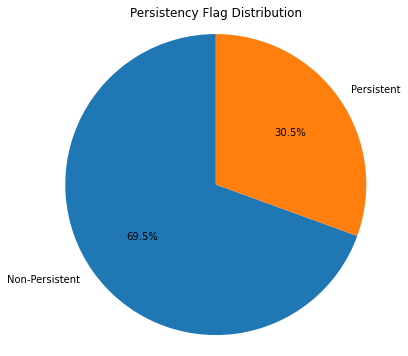

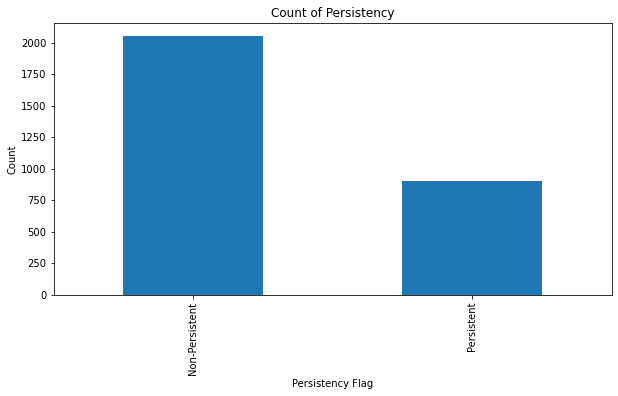

In [53]:
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Persistency Flag Distribution')
plt.axis('equal')
plt.show()

dataset['Persistency_Flag'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Count of Persistency')
plt.xlabel('Persistency Flag')
plt.ylabel('Count')
plt.show()

From the pie chart above, it can be deduced that the percentage of non-persistent patients is more than the percentage of persistent patients with values of 69.5% and 30.5% respectively.

### Persistency Percentage and Count by Gender

In [88]:
#Calculate the persistency percentage by gender
persistency_percentage = dataset.groupby('Gender')['Persistency_Flag'].value_counts(normalize=True).unstack() * 100

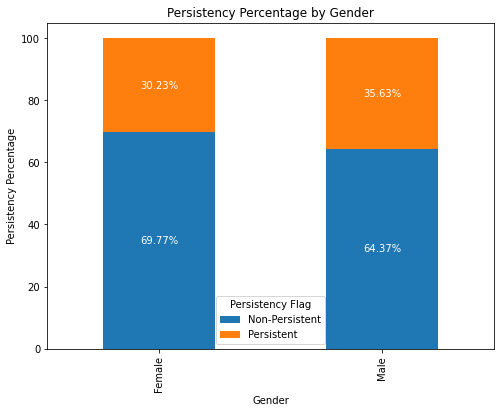

In [89]:
### plot the chart
PP = persistency_percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xlabel('Gender')
plt.ylabel('Persistency Percentage')
plt.title('Persistency Percentage by Gender')

for i in range(len(persistency_percentage.index)):
    prev_percentage = 0
    for j in range(len(persistency_percentage.columns)):
        percentage = persistency_percentage.iloc[i, j]
        PP.text(i, prev_percentage + percentage / 2, f'{percentage:.2f}%', ha='center', va='center', color='white')
        prev_percentage += percentage

plt.legend(title='Persistency Flag')        
plt.show()

The percentage of non-persistent female (69.77%) is higher than the percentage of non-persistent male (64.37%). Evidently, the males are more persistent than females. 

In [56]:
#calculate the count of persistency by gender
persistency_counts = dataset.groupby('Gender')['Persistency_Flag'].value_counts().unstack()

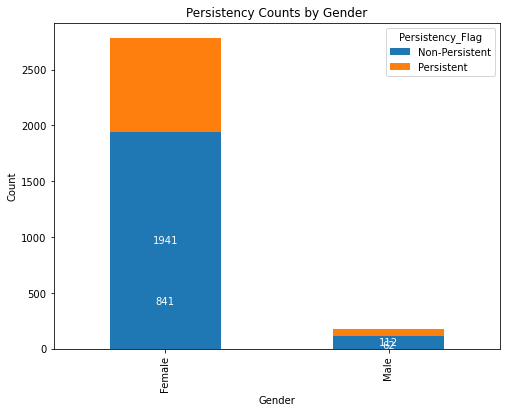

In [63]:
#plot the stacked barchart
PC = persistency_counts.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Persistency Counts by Gender')

for i in range(len(persistency_counts.index)):
    for j in range(len(persistency_counts.columns)):
        count = persistency_counts.iloc[i, j]
        PC.text(i, count / 2, str(count), ha='center', va='center', color='white')
    



### Persistency Percentage by Race

In [66]:
# Calculate the persistency percentage by race
persistency_percentage = dataset.groupby('Race')['Persistency_Flag'].value_counts(normalize=True).unstack() * 100

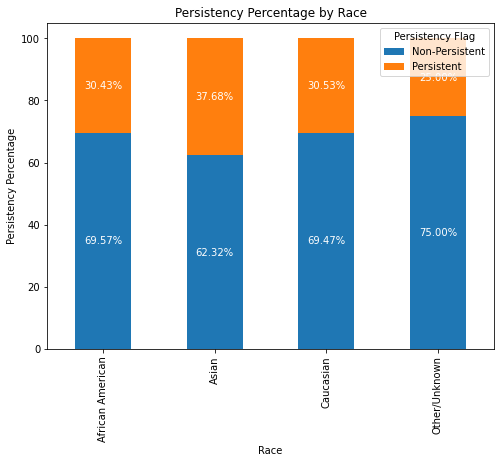

In [67]:
# Plot the stacked bar chart
PPR = persistency_percentage.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.xlabel('Race')
plt.ylabel('Persistency Percentage')
plt.title('Persistency Percentage by Race')

for i in range(len(persistency_percentage.index)):
    prev_percentage = 0
    for j in range(len(persistency_percentage.columns)):
        percentage = persistency_percentage.iloc[i, j]
        PPR.text(i, prev_percentage + percentage / 2, f'{percentage:.2f}%', ha='center', va='center', color='white')
        prev_percentage += percentage

plt.legend(title='Persistency Flag')

plt.show()

It can be deduced from the plot that Asians have the highest persistency percentage of 37.68% compared to other races shown

### Persistency percentage by Region

In [68]:
# Calculate the persistency percentage by region
persistency_percentage = dataset.groupby('Region')['Persistency_Flag'].value_counts(normalize=True).unstack() * 100

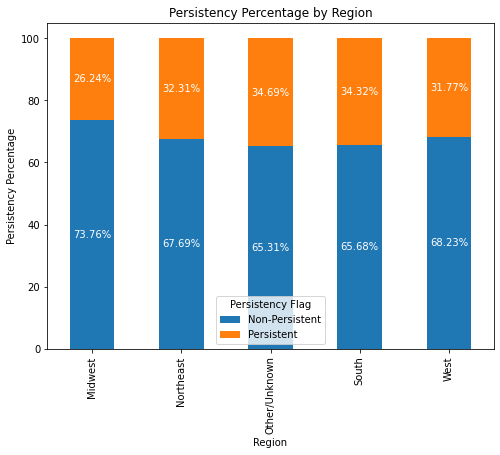

In [69]:
# Plot the stacked bar chart
PPRe = persistency_percentage.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.xlabel('Region')
plt.ylabel('Persistency Percentage')
plt.title('Persistency Percentage by Region')

for i in range(len(persistency_percentage.index)):
    prev_percentage = 0
    for j in range(len(persistency_percentage.columns)):
        percentage = persistency_percentage.iloc[i, j]
        PPRe.text(i, prev_percentage + percentage / 2, f'{percentage:.2f}%', ha='center', va='center', color='white')
        prev_percentage += percentage

plt.legend(title='Persistency Flag')

plt.show()

The highest percentage of non-persistent drug users are from the midwest with 73.76% while the highest percentage of persistent drug users are from unknown region with 34.69%

### Persistency Percentage by Age_Bucket

In [70]:
# Calculate the persistency percentage by region
persistency_percentage = dataset.groupby('Age_Bucket')['Persistency_Flag'].value_counts(normalize=True).unstack() * 100

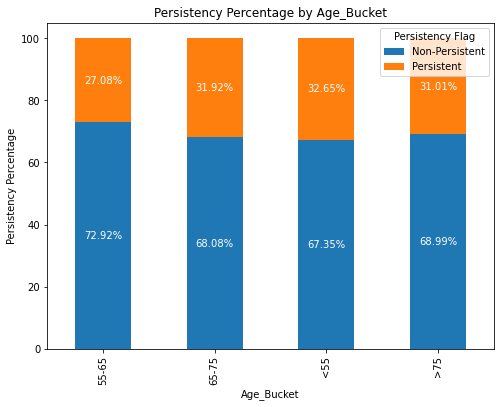

In [71]:
# Plot the stacked bar chart
PPA = persistency_percentage.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.xlabel('Age_Bucket')
plt.ylabel('Persistency Percentage')
plt.title('Persistency Percentage by Age_Bucket')

for i in range(len(persistency_percentage.index)):
    prev_percentage = 0
    for j in range(len(persistency_percentage.columns)):
        percentage = persistency_percentage.iloc[i, j]
        PPA.text(i, prev_percentage + percentage / 2, f'{percentage:.2f}%', ha='center', va='center', color='white')
        prev_percentage += percentage

plt.legend(title='Persistency Flag')

plt.show()

There is no much difference in the persistency and non-persistency of drug users in the age bucket, but the highest persistent drug users are <55 while the lowest are those in the age bucket of 55-65

### Persistency Percentage by Change_Risk_Segment

In [72]:
# Calculate the persistency percentage by change_risk_segment
persistency_percentage = dataset.groupby('Change_Risk_Segment')['Persistency_Flag'].value_counts(normalize=True).unstack() * 100

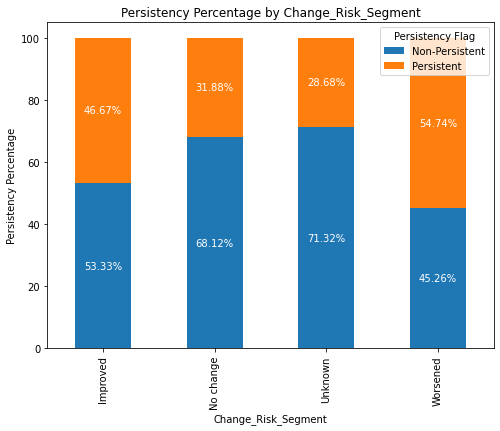

In [73]:
# Plot the stacked bar chart
PPC = persistency_percentage.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.xlabel('Change_Risk_Segment')
plt.ylabel('Persistency Percentage')
plt.title('Persistency Percentage by Change_Risk_Segment')

for i in range(len(persistency_percentage.index)):
    prev_percentage = 0
    for j in range(len(persistency_percentage.columns)):
        percentage = persistency_percentage.iloc[i, j]
        PPC.text(i, prev_percentage + percentage / 2, f'{percentage:.2f}%', ha='center', va='center', color='white')
        prev_percentage += percentage

plt.legend(title='Persistency Flag')

plt.show()

The highest percentage of persistent drug users are those with worsened change risk segment (54.74%) followed by those with improved change risk segment (46.67%)

### Dexa_Freq_During_Rx by Persistency_Flag and Specialist_Flag

Text(0.5, 1.0, 'Dexa scans during Rx by Persistency and Specialist')

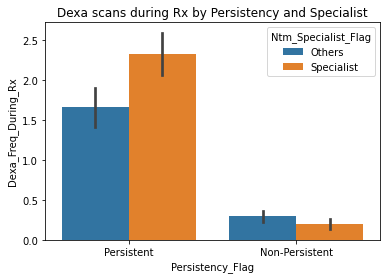

In [86]:
sns.barplot(x='Persistency_Flag',y='Dexa_Freq_During_Rx',data=dataset, hue='Ntm_Specialist_Flag')
plt.title("Dexa scans during Rx by Persistency and Specialist")

Dexa scans during Rx are high for persistent patients who got prescribed by NTM Specialist. There are no difference for NTM Specialist and others in Dexa scans for non persistent patients.

### Count of risks by persistency and Adherence

Text(0.5, 1.0, 'Average no of risks by Persistency and adherence to therapies')

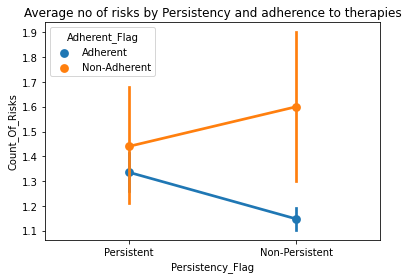

In [87]:
sns.pointplot(x='Persistency_Flag',y='Count_Of_Risks',data=dataset, hue='Adherent_Flag')
plt.title("Average no of risks by Persistency and adherence to therapies")

The count of risks for Persistent patients are high for Non-Adherent and low for Adherent patients.Similarly, for Non persistent patients, the count of risks are high when patients are non adherent.